In [1]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np

plt.style.use("seaborn")

/home/ubuntu/anaconda3/envs/cs231n/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results_file = "results"

In [3]:
result_paths = filter(lambda x: "results" in x, os.listdir("results"))

In [4]:
results = {}
for path in result_paths:
    experiment = path.split("_")[0]
    result = torch.load(os.path.join(results_file, path))
    results[experiment] = result

In [5]:
for key in sorted(results.keys()):
    print(key)

flownet0A
flownet0NA
flownet2000A
flownet2000NA
flownet500A
flownet500NA
raft0A
raft0NA
raft2000A
raft2000NA
raft500A
raft500NA


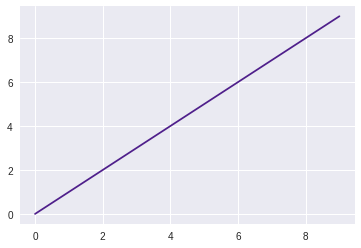

In [81]:
c = plt.cm.get_cmap("Purples")
plt.plot(range(10), range(10), color=c(0.9))

In [136]:
purples = plt.cm.get_cmap("Purples")
greys = plt.cm.get_cmap("Greys")
greens = plt.cm.get_cmap("Greens")
reds = plt.cm.get_cmap("Reds")
blues = plt.cm.get_cmap("Blues")
oranges = plt.cm.get_cmap("Oranges")

size_colors = {
    "raftA": purples(0.65),
    "raftNA": purples(0.95),
    "flownetA": greys(0.65),
    "flownetNA": greys(0.95),
}
model_colors = {
    "A0": greens(0.7),
    "A500": greens(0.85),
    "A2000": greens(.99),
    "NA0": reds(0.7),
    "NA500": reds(0.85),
    "NA2000": reds(.99),
}
aug_colors = {
    "raft0": blues(0.7),
    "raft500": blues(0.85),
    "raft2000": blues(0.99),
    "flownet0": oranges(0.7),
    "flownet500": oranges(0.85),
    "flownet2000": oranges(.99),
}

In [137]:
def plot_size_losses(size, title, ax):
    for model in ["raft", "flownet"]:
        for aug in ["A", "NA"]:
            result = "".join([model, size, aug])
            experiment = results[result]
            losses = experiment["pretrain_losses"] + experiment["finetune_losses"]
            ax.plot(np.arange(len(losses)), losses, label=model + " " + aug, color=size_colors["".join([model, aug])], )
    if size != str("0"):
        ax.axvline(x=100, color='black', linestyle='dotted', linewidth=2)
    ax.set_ylim((0, 20))
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("EPE Loss")

In [138]:
def plot_model_losses(model, title, ax):
    for size in ["0", "500", "2000"]:
        for aug in ["A", "NA"]:
            result = "".join([model, size, aug])
            experiment = results[result]
            losses = experiment["pretrain_losses"] + experiment["finetune_losses"]
            if size != "0":
                indices = np.arange(len(losses))
            else:
                indices = np.arange(len(losses)) + 100
            ax.plot(indices, losses, label=size + " " + aug, color=model_colors["".join([aug, size])])
    ax.axvline(x=100, color='black', linestyle='dotted', linewidth=2)
    ax.set_ylim((0, 20))
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("EPE Loss")
    
def plot_aug_losses(aug, title, ax):
    for size in ["0", "500", "2000"]:
        for model in ["raft", "flownet"]:
            result = "".join([model, size, aug])
            experiment = results[result]
            losses = experiment["pretrain_losses"] + experiment["finetune_losses"]
            if size != "0":
                indices = np.arange(len(losses))
            else:
                indices = np.arange(len(losses)) + 100
            ax.plot(indices, losses, label=model + " " + size, color=aug_colors["".join([model, size])])
    ax.axvline(x=100, color='black', linestyle='dotted', linewidth=2)
    ax.set_ylim((0, 20))
    ax.set_title(title)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("EPE Loss")

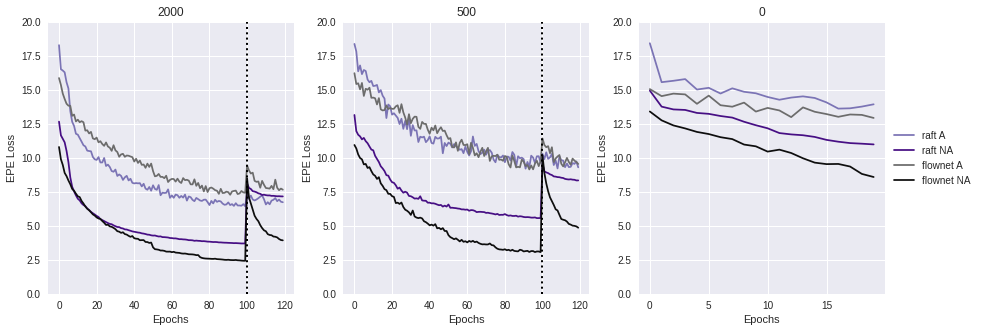

In [139]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plot_size_losses("2000", "2000", ax1)
plot_size_losses("500", "500", ax2)
plot_size_losses("0", "0", ax3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

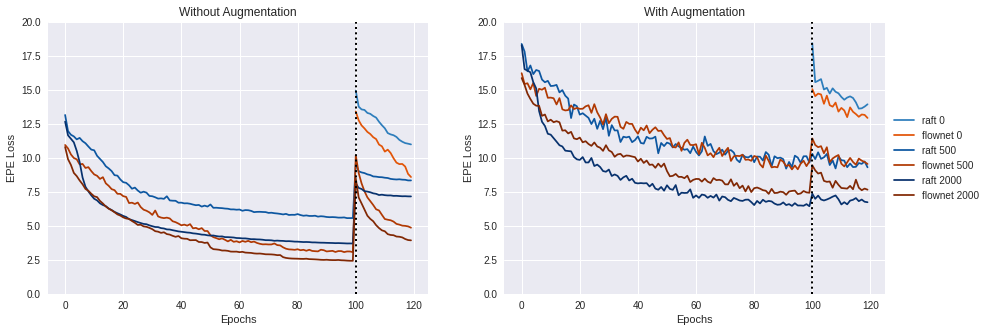

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_aug_losses("NA", "Without Augmentation", ax1)
plot_aug_losses("A", "With Augmentation", ax2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

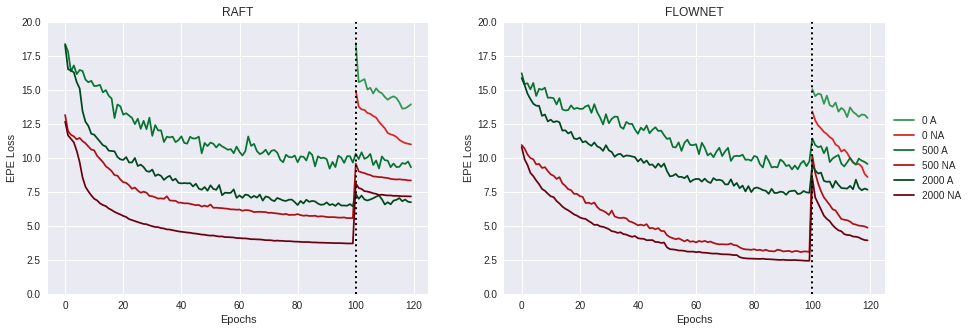

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_model_losses("raft", "RAFT", ax1)
plot_model_losses("flownet", "FLOWNET", ax2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
import torchvision